# Data Visualization with Matplotlib & Seaborn

#### Stock Price Chart with Volume and Moving Averages

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


Market Data Dashboard Performance Summary:
        Mean Daily Return  Daily Volatility  Annualized Volatility  \
Ticker                                                               
AAPL             0.001835          0.012570               0.199543   
GOOGL            0.001990          0.019149               0.303982   
MSFT             0.001972          0.015824               0.251204   
WMT              0.000485          0.009844               0.156262   

        Max Daily Return  Min Daily Return  
Ticker                                      
AAPL            0.046927         -0.048020  
GOOGL           0.072787         -0.095094  
MSFT            0.072435         -0.043743  
WMT             0.024499         -0.080928  


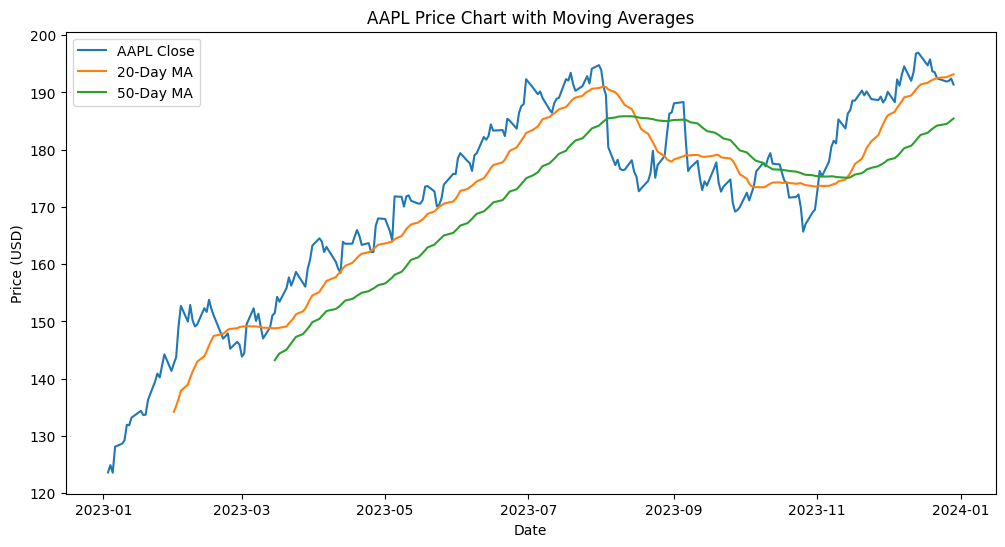

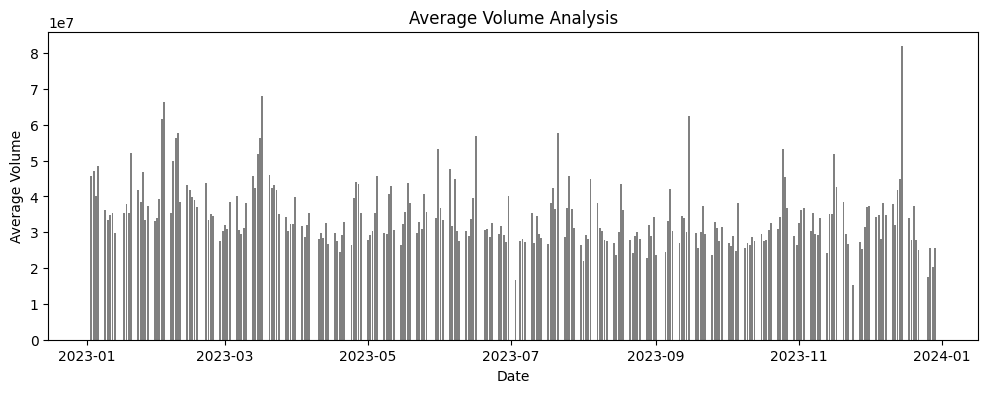

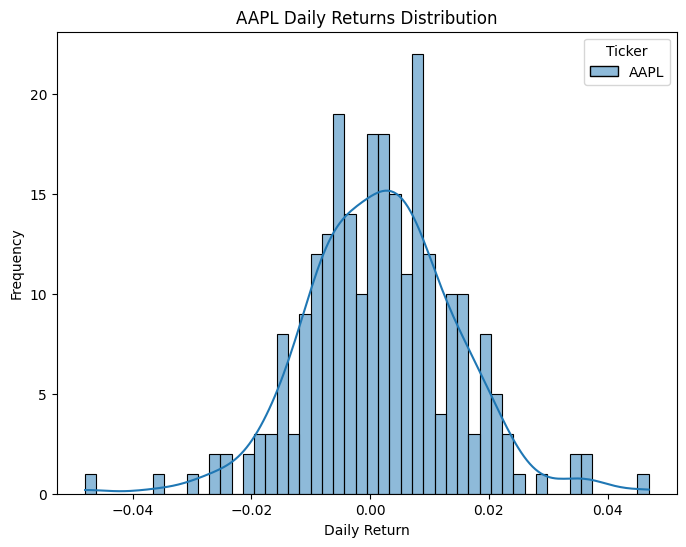

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define tickers and date range
tickers = ['AAPL', 'MSFT', 'GOOGL', 'WMT']
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download data; we use 'Close' prices 
data = yf.download(tickers, start=start_date, end=end_date)['Close']
vol_data = yf.download(tickers, start=start_date, end=end_date)['Volume']

# Calculate daily returns and volatility
daily_returns = data.pct_change().dropna()
daily_volatility = daily_returns.std()
annualized_volatility = daily_volatility * np.sqrt(252)

# Generate performance summary
performance_summary = pd.DataFrame({
    'Mean Daily Return': daily_returns.mean(),
    'Daily Volatility': daily_volatility,
    'Annualized Volatility': annualized_volatility,
    'Max Daily Return': daily_returns.max(),
    'Min Daily Return': daily_returns.min()
})

print("Market Data Dashboard Performance Summary:")
print(performance_summary)

# Plot Price Chart with Moving Averages for a chosen ticker (e.g., AAPL)
aapl_data = yf.download('AAPL', start=start_date, end=end_date)
aapl_close = aapl_data['Close']
aapl_data['MA20'] = aapl_close.rolling(window=20).mean()
aapl_data['MA50'] = aapl_close.rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(aapl_data.index, aapl_close, label='AAPL Close')
plt.plot(aapl_data.index, aapl_data['MA20'], label='20-Day MA')
plt.plot(aapl_data.index, aapl_data['MA50'], label='50-Day MA')
plt.title("AAPL Price Chart with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Plot Volume Analysis (average volume across tickers)
avg_volume = vol_data.mean(axis=1)
plt.figure(figsize=(12,4))
plt.bar(avg_volume.index, avg_volume, color='grey')
plt.title("Average Volume Analysis")
plt.xlabel("Date")
plt.ylabel("Average Volume")
plt.show()

# Plot Returns Distribution for AAPL
aapl_returns = aapl_close.pct_change().dropna()
plt.figure(figsize=(8,6))
sns.histplot(aapl_returns, bins=50, kde=True)
plt.title("AAPL Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


[*********************100%***********************]  1 of 1 completed


Technical Analysis (Last 10 days):
Price            Close       SMA_5      SMA_20 Signal  \
Ticker            AAPL                                  
Date                                                    
2023-12-15  196.390884  195.134433  191.375503      1   
2023-12-18  194.720901  195.673196  191.683651      1   
2023-12-19  195.764664  196.116534  191.956514      1   
2023-12-20  193.667252  195.494272  192.164764      1   
2023-12-21  193.518112  194.812363  192.332259      1   
2023-12-22  192.444595  194.023105  192.512675      1   
2023-12-26  191.897858  193.458496  192.674702      1   
2023-12-27  191.997284  192.705020  192.811382     -1   
2023-12-28  192.424713  192.456512  193.020625     -1   
2023-12-29  191.380951  192.029080  193.148855     -1   

Price      Cumulative Strategy Return Cumulative Market Return  
Ticker                                                          
Date                                                            
2023-12-15                  

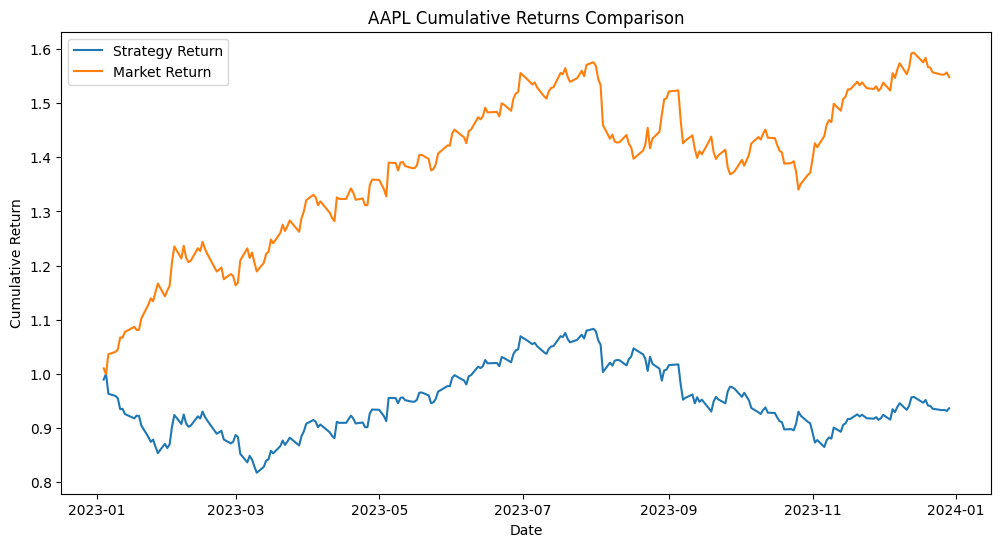

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download historical data for AAPL
df = yf.download(ticker, start=start_date, end=end_date)

# Use 'Close' prices
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Generate signals: Buy (1) when SMA_5 > SMA_20, Sell (-1) otherwise
df['Signal'] = np.where(df['SMA_5'] > df['SMA_20'], 1, -1)

# Backtest strategy
df['Daily Return'] = df['Close'].pct_change()
# Shift signals by 1 to avoid lookahead bias
df['Strategy Return'] = df['Signal'].shift(1) * df['Daily Return']
df['Cumulative Strategy Return'] = (1 + df['Strategy Return']).cumprod()
df['Cumulative Market Return'] = (1 + df['Daily Return']).cumprod()

print("Technical Analysis (Last 10 days):")
print(df[['Close', 'SMA_5', 'SMA_20', 'Signal', 'Cumulative Strategy Return', 'Cumulative Market Return']].tail(10))

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Cumulative Strategy Return'], label='Strategy Return')
plt.plot(df.index, df['Cumulative Market Return'], label='Market Return')
plt.title(f"{ticker} Cumulative Returns Comparison")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()


#### Current Yield Curve Using Treasury Data (FRED & yfinance)

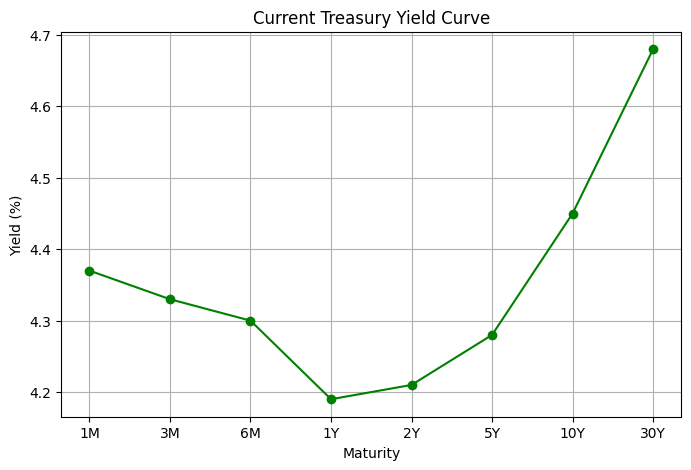

In [5]:
import matplotlib.pyplot as plt
from fredapi import Fred

fred_api_key = '732e3423380ec3230c311938303e797d'
fred = Fred(api_key=fred_api_key)

# Treasury yields FRED series codes (example series)
yield_series = {
    '1M': 'GS1M',
    '3M': 'GS3M',
    '6M': 'GS6M',
    '1Y': 'GS1',
    '2Y': 'GS2',
    '5Y': 'GS5',
    '10Y': 'GS10',
    '30Y': 'GS30'
}

# Fetch current yield for each maturity
maturities = []
yields = []
for mat, series in yield_series.items():
    try:
        series_data = fred.get_series(series)
        # Get the latest available yield
        latest_yield = series_data.dropna().iloc[-1]
        maturities.append(mat)
        yields.append(latest_yield)
    except Exception as e:
        print(f"Error retrieving {series}: {e}")

plt.figure(figsize=(8,5))
plt.plot(maturities, yields, marker='o', linestyle='-', color='green')
plt.title("Current Treasury Yield Curve")
plt.xlabel("Maturity")
plt.ylabel("Yield (%)")
plt.grid(True)
plt.show()


#### Visualize Inflation Data with Recession Highlighting

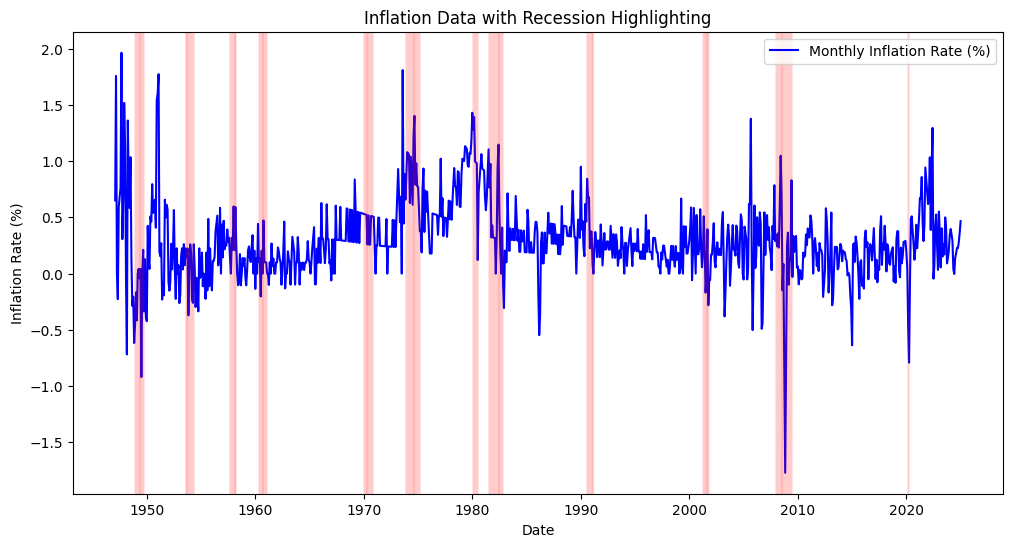

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from fredapi import Fred

fred_api_key = '732e3423380ec3230c311938303e797d'
fred = Fred(api_key=fred_api_key)

# Download CPI data and recession indicator
cpi = fred.get_series('CPIAUCSL')  # Consumer Price Index for All Urban Consumers
# Convert CPI to monthly inflation rate (percentage change)
inflation = cpi.pct_change().dropna() * 100

# Recession indicator: USREC (1 = recession, 0 = no recession)
recessions = fred.get_series('USREC')

# Create a DataFrame and align dates
df = pd.DataFrame({'Inflation': inflation, 'Recession': recessions})
df = df.dropna()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Inflation'], label="Monthly Inflation Rate (%)", color='blue')
# Highlight recession periods (where Recession == 1)
recession_periods = df[df['Recession'] == 1]
for date in recession_periods.index:
    plt.axvline(date, color='red', alpha=0.1)

plt.title("Inflation Data with Recession Highlighting")
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.show()


#### Yield Curve Animation Showing Changes Over Time

C:\Users\jonat\AppData\Local\Temp\ipykernel_93360\131573709.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start_date, end_date, freq='M')


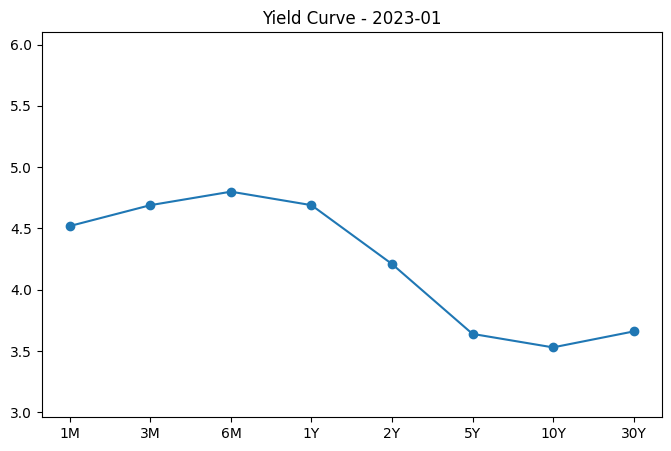

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
from fredapi import Fred

fred_api_key = '732e3423380ec3230c311938303e797d'
fred = Fred(api_key=fred_api_key)

# Define maturities and corresponding FRED series codes
yield_series = {
    '1M': 'GS1M',
    '3M': 'GS3M',
    '6M': 'GS6M',
    '1Y': 'GS1',
    '2Y': 'GS2',
    '5Y': 'GS5',
    '10Y': 'GS10',
    '30Y': 'GS30'
}

# Define a date range for the animation
start_date = '2023-01-01'
end_date = '2023-12-31'
dates = pd.date_range(start_date, end_date, freq='M')

# Build a list of yield curves over time
yield_curves = []
for date in dates:
    curve = []
    for series in yield_series.values():
        try:
            series_data = fred.get_series(series, observation_start=date, observation_end=date)
            if not series_data.empty:
                curve.append(series_data.iloc[-1])
            else:
                curve.append(np.nan)
        except Exception:
            curve.append(np.nan)
    yield_curves.append(curve)

# Convert list to numpy array (time x maturities)
yield_curves = np.array(yield_curves)

fig, ax = plt.subplots(figsize=(8,5))
maturities = list(yield_series.keys())
line, = ax.plot(maturities, yield_curves[0], marker='o')
ax.set_ylim(np.nanmin(yield_curves)-0.5, np.nanmax(yield_curves)+0.5)
ax.set_title("Yield Curve Animation")

def update(frame):
    line.set_ydata(yield_curves[frame])
    ax.set_title(f"Yield Curve - {dates[frame].strftime('%Y-%m')}")
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(dates), interval=1000, blit=True)
plt.show()


#### Sector Rotation Analysis Dashboard

[*********************100%***********************]  5 of 5 completed


Sector Rotation Analysis Dashboard:
        Cumulative Return (%)
Ticker                       
XLK                 57.511986
XLY                 40.476769
XLF                 11.639224
XLE                  2.984262
XLV                  2.360445


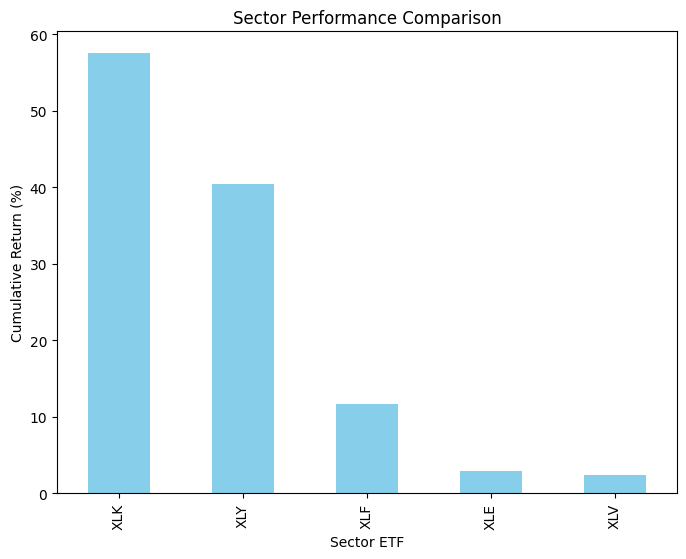

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define sector ETFs (example: XLK, XLF, XLE, XLY, XLV)
sector_etfs = ['XLK', 'XLF', 'XLE', 'XLY', 'XLV']
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download Adjusted Close prices for sector ETFs
sector_data = yf.download(sector_etfs, start=start_date, end=end_date)['Close']

# Calculate cumulative returns for each ETF over the period
cumulative_returns = (sector_data.iloc[-1] / sector_data.iloc[0] - 1) * 100
sector_analysis = pd.DataFrame({
    'Cumulative Return (%)': cumulative_returns
}).sort_values(by='Cumulative Return (%)', ascending=False)

print("Sector Rotation Analysis Dashboard:")
print(sector_analysis)

# Plot sector performance
plt.figure(figsize=(8,6))
sector_analysis['Cumulative Return (%)'].plot(kind='bar', color='skyblue')
plt.title("Sector Performance Comparison")
plt.ylabel("Cumulative Return (%)")
plt.xlabel("Sector ETF")
plt.show()


#### Bond Price Sensitivity Visualization Tool

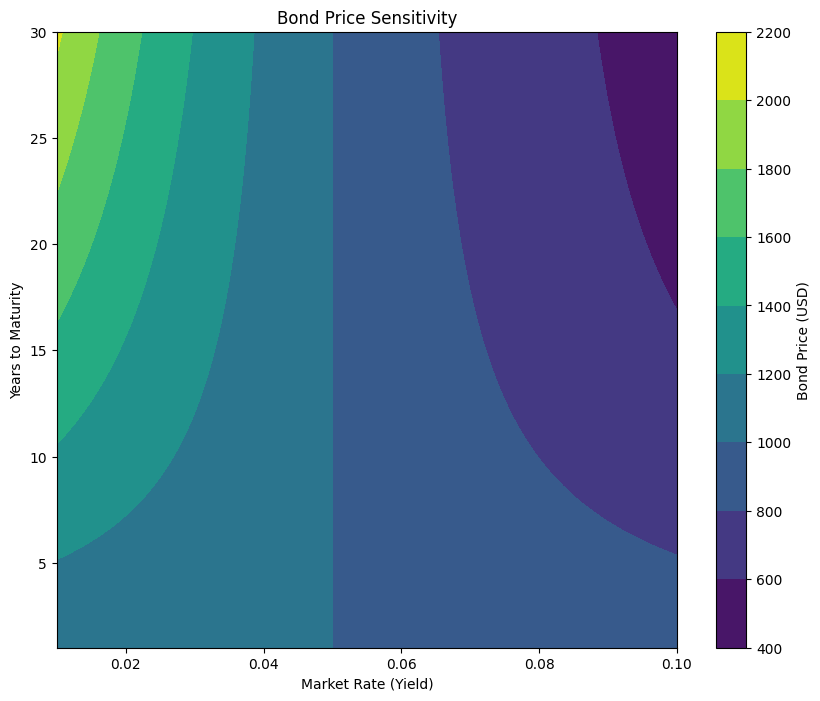

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def bond_price(face_value, coupon_rate, years, market_rate):
    """
    Calculate bond price using the formula:
    Price = (coupon * (1 - (1+market_rate)^(-years)) / market_rate) + (face_value / (1+market_rate)^years)
    """
    coupon = face_value * coupon_rate
    price = (coupon * (1 - (1 + market_rate)**(-years)) / market_rate) + (face_value / (1 + market_rate)**years)
    return price

# Define a grid of market rates and maturities
yields = np.linspace(0.01, 0.10, 100)  # 1% to 10%
maturities = np.linspace(1, 30, 100)     # 1 to 30 years
Y, T = np.meshgrid(yields, maturities)

# Calculate bond prices on the grid (for a bond with face value 1000 and coupon rate 5%)
prices = bond_price(1000, 0.05, T, Y)

plt.figure(figsize=(10,8))
cp = plt.contourf(Y, T, prices, cmap='viridis')
plt.colorbar(cp, label='Bond Price (USD)')
plt.title("Bond Price Sensitivity")
plt.xlabel("Market Rate (Yield)")
plt.ylabel("Years to Maturity")
plt.show()
